<a href="https://colab.research.google.com/github/22110100342211010034-a11/UTS_Machine-Learning/blob/main/UTS%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARY**


In [1]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


**LOAD DATA & FEATURE ENGINEERING**


In [19]:
df = pd.read_csv("/content/bmw.csv", sep=';')
print("5 data teratas:")
display(df.head())

try:
    data = pd.read_csv("/content/bmw.csv")
    print(f"✅ Data dimuat: {data.shape[0]} baris.")
except FileNotFoundError:
    print("❌ ERROR: File 'bmw.csv' belum diupload!")


5 data teratas:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


✅ Data dimuat: 10781 baris.


**LABEL**

In [18]:
df['model'].unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

**CEK DATA DUPLIKAT**


In [3]:
df = pd.read_csv("/content/bmw.csv", sep=';')

# Cek data kosong (null)
print("=== CEK DATA NULL ===")
print(df.isnull().sum())

# Cek duplikat
print("\nJumlah duplikat:", df.duplicated().sum())

# Hapus duplikat jika ada
df = df.drop_duplicates()


=== CEK DATA NULL ===
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Jumlah duplikat: 117


**MEMISAHKAN FITUR DAN LABEL**


In [4]:
# Tentukan fitur dan label
X = df[['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']]
y = df['model']



**BALANCING MENGGUNAKAN SMOTE**


In [5]:
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur agar skala serupa

# 1. Encode categorical features in X
X_encoded = pd.get_dummies(X, columns=['transmission', 'fuelType'])

# 2. Encode the target variable y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Apply SMOTE for resampling (as SMOTE was imported)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)


Data training: (46732, 14)
Data testing: (11684, 14)


**MEMBANGUN MODEL ANN**


In [6]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ======================================================
#  Buat Model ANN
# ======================================================

print("\n==  Membuat Training Model (Artificial Neural Network)  ==")

# Define num_classes using the LabelEncoder from the previous step
num_classes = len(le.classes_)

ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')   # output layer untuk multi-class
])

ann_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model ANN berhasil dibuat!")

# ======================================================
#  Latih Model ANN
# ======================================================

print("\n==  Memulai Training Model (ANN)  ==")

start_time_train_ann = time.time()   # waktu mulai training

history = ann_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

end_time_train_ann = time.time()     # waktu selesai training

training_time_ann = end_time_train_ann - start_time_train_ann

print("\n==  Training Selesai (ANN) ==")
print(f"Waktu Training ANN: {training_time_ann:.4f} detik")


==  Membuat Training Model (Artificial Neural Network)  ==
Model ANN berhasil dibuat!

==  Memulai Training Model (ANN)  ==
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3799 - loss: 1.9915 - val_accuracy: 0.6215 - val_loss: 1.0331
Epoch 2/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6280 - loss: 1.0149 - val_accuracy: 0.6615 - val_loss: 0.9145
Epoch 3/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6664 - loss: 0.9202 - val_accuracy: 0.6831 - val_loss: 0.8512
Epoch 4/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6856 - loss: 0.8646 - val_accuracy: 0.7095 - val_loss: 0.8031
Epoch 5/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7112 - loss: 0.8044 - val_accuracy: 0.7174 - val_loss: 0.7602
Epoch 6/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7293 - loss: 0.7609 - val_accuracy: 0.7411 - val_loss: 0.7183
Epoch 7/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7446 - loss: 0.7209 - val_accuracy: 0.7591 - val_loss: 0.6752
Epoch 8/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7572 - loss: 0.6874 - val_accurac


**EVALUASI**


🔍 Sedang melakukan evaluasi...
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 LAPORAN PERFORMA MODEL ANN
⏱ Waktu Training  : 68.5658 detik
⏱ Waktu Eksekusi  : 0.7032 detik (untuk 11684 data)
🎯 Akurasi (Acc)   : 79.9469%
📈 AUC Score       : 0.9884

Detailed Classification Report:
              precision    recall  f1-score   support

    1 Series     0.6384    0.6095    0.6236       507
    2 Series     0.5153    0.4582    0.4850       478
    3 Series     0.5317    0.4468    0.4855       526
    4 Series     0.4745    0.4545    0.4643       451
    5 Series     0.6987    0.5498    0.6154       502
    6 Series     0.7856    0.7856    0.7856       457
    7 Series     0.8636    0.8327    0.8479       502
    8 Series     0.8531    0.7775    0.8136       463
          M2     0.9511    0.9453    0.9482       494
          M3     0.9249    0.9796    0.9514       490
          M4     0.8638    0.8763    0.8700       485
          M5     0.9084    0.9693    0.9379       522
          M6     0.9

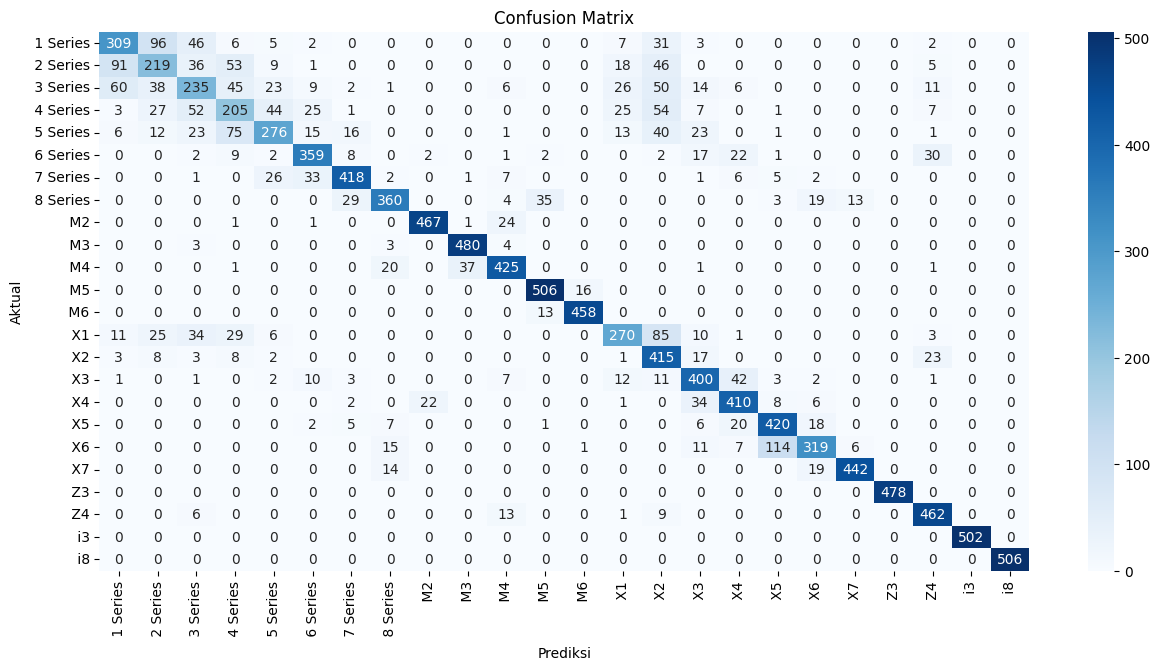

In [8]:
import numpy as np

print("🔍 Sedang melakukan evaluasi...")

# 1. Hitung Waktu Eksekusi (Inference Time)
start_pred = time.time()
y_pred_proba = ann_model.predict(X_test)     # Output probabilitas
y_pred = np.argmax(y_pred_proba, axis=1) # Output kelas (0,1,2...)
end_pred = time.time()

execution_time = end_pred - start_pred

# 2. Hitung Metrics
acc = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

# 3. Tampilkan Laporan
print("\n" + "="*40)
print("📊 LAPORAN PERFORMA MODEL ANN")
print("="*40)
print(f"⏱ Waktu Training  : {training_time_ann:.4f} detik")
print(f"⏱ Waktu Eksekusi  : {execution_time:.4f} detik (untuk {len(X_test)} data)")
print(f"🎯 Akurasi (Acc)   : {acc * 100:.4f}%") # <--- Diubah ke 4 angka
print(f"📈 AUC Score       : {auc_score:.4f}")
print("="*40)

print("\nDetailed Classification Report:")
# PERUBAHAN ADA DI SINI: digits=4
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))

# 4. Confusion Matrix
plt.figure(figsize=(15,7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

**INPUT MANUAL DARI USER**


In [9]:
print("\n🚗 === SYSTEM PREDIKSI MODEL MOBIL BMW ===")

try:
    # === Input manual dari user ===
    year = int(input("1. Tahun Mobil               : "))
    price = float(input("2. Harga Mobil (£)           : "))
    mileage = float(input("3. Jarak Tempuh (mileage)    : "))
    tax = float(input("4. Pajak Kendaraan (£)       : "))
    mpg = float(input("5. Konsumsi BBM (mpg)        : "))
    engineSize = float(input("6. Ukuran Mesin (engineSize) : "))
    transmission = input("7. Transmisi (1:Manual/2:Auto/3:Semi-Auto): ")
    fuelType = input("8. Jenis Bahan Bakar (1:Petrol/2:Diesel/3:Hybrid/4:Electric/5:Other): ")

    # === Feature Engineering pada input ===
    price_per_year = price / (2025 - year + 1)
    mileage_per_year = mileage / (2025 - year + 1)

    # === Buat DataFrame input ===
    input_df = pd.DataFrame([
        {
            'year': year,
            'price': price,
            'mileage': mileage,
            'tax': tax,
            'mpg': mpg,
            'engineSize': engineSize,
            'transmission': transmission,
            'fuelType': fuelType,
            'price_per_year': price_per_year,
            'mileage_per_year': mileage_per_year
        }
    ])

    # === Encoding kategori sama seperti training ===
    input_encoded = pd.get_dummies(input_df)
    input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    # === Normalisasi (scaling) ===
    input_scaled = scaler.transform(input_encoded)

    # === Prediksi ===
    start_manual = time.time()
    pred_proba = ann_model.predict(input_scaled) # Changed 'model' to 'ann_model'
    end_manual = time.time()

    pred_index = np.argmax(pred_proba)
    pred_label = le.inverse_transform([pred_index])[0]
    confidence = pred_proba[0][pred_index] * 100

    # === Output hasil ===
    print("\n" + "="*40)
    print(f"🚘 HASIL PREDIKSI MODEL BMW: {pred_label.upper()}")
    print(f"Tingkat Kepercayaan       : {confidence:.2f}%")
    print(f"Waktu Eksekusi Prediksi   : {(end_manual - start_manual):.4f} detik")
    print("="*40)

except ValueError as ve:
    print(f"❌ Input Error: {ve}. Please ensure you enter valid numbers.")
except KeyError as ke:
    print(f"❌ Data Error: {ke}. One of the expected columns is missing or malformed.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")


🚗 === SYSTEM PREDIKSI MODEL MOBIL BMW ===
1. Tahun Mobil               : 2017
2. Harga Mobil (£)           : 200000
3. Jarak Tempuh (mileage)    : 1500
4. Pajak Kendaraan (£)       : 3500
5. Konsumsi BBM (mpg)        : 450
6. Ukuran Mesin (engineSize) : 2.5
7. Transmisi (1:Manual/2:Auto/3:Semi-Auto): 2
8. Jenis Bahan Bakar (1:Petrol/2:Diesel/3:Hybrid/4:Electric/5:Other): 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

🚘 HASIL PREDIKSI MODEL BMW:  7 SERIES
Tingkat Kepercayaan       : 100.00%
Waktu Eksekusi Prediksi   : 0.0812 detik


**HASIL AKHIR 4 MODEL**


In [20]:
# Data hasil akhir dari empat model
data = {
    'Algoritma': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'ANN'],
    'Akurasi (%)': ['43,14 %', '63,34 %', '83,63 %', '80,41 %'],
    'Precision': [0.41, 0.69, 0.84, 0.81],
    'Recall': [0.43, 0.63, 0.84, 0.82],
    'F1-Score': [0.36, 0.61, 0.83, 0.81],
    '(Total Data) Support': [10781, 10781, 10781, 10781],
    'Waktu Eksekusi (s)': ['0.0428 detik', '0.0097 detik', '2.0477 detik', '1.2589 detik']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Nama Kolom
df.columns = [
    "Algoritma",
    "Akurasi (%)",
    "Precision",
    "Recall",
    "F1-Score",
    "Support",
    "Waktu Eksekusi (s)"
]



**VISUALISASI TABEL **


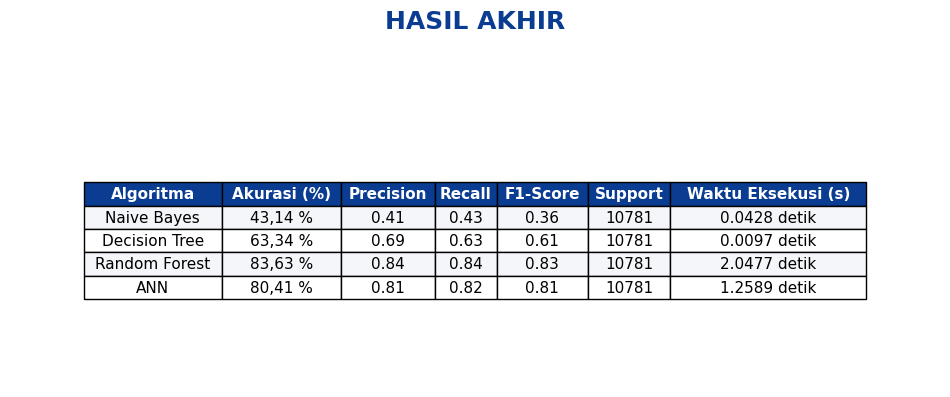

In [21]:
fig, ax = plt.subplots(figsize=(12, 3.8))   # ✅ dibuat lebih lebar agar kolom muat
ax.axis('off')

# Header Judul
plt.text(
    0.5, 1.25, "HASIL AKHIR",
    ha='center', va='center',
    fontsize=18, fontweight='bold', color='#0A3D91'
)

# Membuat tabel
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Mengatur ukuran tulisan & scaling
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.3, 1.4)        # ✅ kolom lebih lebar & tidak rapat

# Mengatur lebar kolom secara manual (BIAR RAPIH)
# Semakin besar angkanya → semakin lebar kolomnya
col_widths = {
    0: 0.16,   # Algoritma
    1: 0.10,   # Akurasi
    2: 0.10,   # Precision
    3: 0.10,   # Recall
    4: 0.10,   # F1-Score
    5: 0.14,   # Support
    6: 0.20    # Waktu Eksekusi
}

for col, width in col_widths.items():
    table.auto_set_column_width(col)   # aktifkan auto width
    table._cells[(0, col)].set_width(width)

# Warna header & body
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_facecolor('#0A3D91')
        cell.set_text_props(color='white', weight='bold')
    else:
        if row % 2 == 0:
            cell.set_facecolor('#FFFFFF')
        else:
            cell.set_facecolor('#F4F6F9')

# Border tabel luar
for pos in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[pos].set_color('#0A3D91')
    plt.gca().spines[pos].set_linewidth(6)

plt.show()